In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn  import model_selection
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,classification_report

import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\719475\\Desktop\\Hackathon'

In [4]:
#Loading the train data
train = pd.read_csv('train.csv')

In [5]:
#Loading the test data
test = pd.read_csv('test.csv')

In [6]:
#Shape of training data
train.shape

(116058, 29)

In [7]:
#Shape of test data
test.shape

(35866, 28)

In [7]:
#Checking for missing values - No missing values found
train.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [8]:
train_trans=train.describe().T

In [9]:
#Getting the 1 & 99 percentile of the data for each column
train_trans['0.01']=train.quantile(0.01)
train_trans['0.99']=train.quantile(0.99)

In [10]:
#More precisely detecting the anomalies in the data
#(Mean-std*3) & (mean+std*3) that is 97.6 percentile
train_trans['cut_off'] = np.std(train) *3
train_trans['lower_limit']=train_trans['mean']-train_trans['cut_off']
train_trans['upper_limit']=train_trans['mean']+train_trans['cut_off']

In [11]:
train_trans

,count,mean,std,min,25%,50%,75%,max,0.01,0.99,cut_off,lower_limit,upper_limit
loan_id,116058.00,549415526471.17,259756028059.07,100000853384.00,324465557294.75,548623903315.00,774303420466.50,999997075153.00,108296327292.67,990814234719.20,779264726934.45,-229849200463.28,1328680253405.62
interest_rate,116058.00,3.87,0.46,2.25,3.50,3.88,4.12,6.75,2.88,5.00,1.38,2.49,5.25
unpaid_principal_bal,116058.00,208226.22,114685.10,11000.00,120000.00,183000.00,278000.00,1200000.00,43000.00,554000.00,344053.82,-135827.59,552280.04
loan_term,116058.00,292.28,89.76,60.00,180.00,360.00,360.00,360.00,120.00,360.00,269.29,22.99,561.57
loan_to_value,116058.00,67.43,17.29,6.00,57.00,72.00,80.00,97.00,21.00,95.00,51.87,15.56,119.31
number_of_borrowers,116058.00,1.59,0.49,1.00,1.00,2.00,2.00,2.00,1.00,2.00,1.47,0.12,3.07
debt_to_income_ratio,116058.00,30.74,9.73,1.00,23.00,31.00,39.00,64.00,10.00,49.00,29.19,1.55,59.93
borrower_credit_score,116058.00,769.93,42.21,0.00,751.00,782.00,800.00,840.00,650.00,820.00,126.63,643.30,896.56
insurance_percent,116058.00,2.79,8.10,0.00,0.00,0.00,0.00,40.00,0.00,30.00,24.29,-21.50,27.08
co-borrower_credit_score,116058.00,459.61,381.95,0.00,0.00,740.00,791.00,836.00,0.00,819.00,1145.84,-686.22,1605.45


In [11]:
#Getting the correlation between Quantitative Features
#Interest Rate is positively correlated to Loan Term, Loan to Value,debt_to_income_ratio
#co-borrower_credit_score is positively correlated to number of borrowers
#Insurance percent is positively corelated to loan_to_value
train.corr(method='pearson').head(11)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
loan_id,1.00,-0.00,0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
interest_rate,-0.00,1.00,-0.00,0.72,0.27,-0.13,0.18,-0.21,0.14,-0.14,0.06,0.02,0.03,0.03,0.03,0.04,0.03,0.03,0.04,0.04,0.04,0.04,0.04,0.05
unpaid_principal_bal,0.01,-0.00,1.00,0.19,0.06,0.13,0.07,0.05,0.01,0.13,0.02,0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02
loan_term,-0.00,0.72,0.19,1.00,0.29,-0.11,0.14,-0.07,0.19,-0.11,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.02,0.02
loan_to_value,0.00,0.27,0.06,0.29,1.00,-0.10,0.13,-0.14,0.49,-0.11,0.08,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02
number_of_borrowers,0.00,-0.13,0.13,-0.11,-0.10,1.00,-0.13,0.12,-0.06,1.00,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.03,-0.03,-0.03,-0.03,-0.03,-0.04
debt_to_income_ratio,0.00,0.18,0.07,0.14,0.13,-0.13,1.00,-0.18,0.07,-0.15,0.02,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.03,0.02,0.02,0.03,0.02,0.04
borrower_credit_score,0.00,-0.21,0.05,-0.07,-0.14,0.12,-0.18,1.00,-0.06,0.15,-0.00,-0.04,-0.05,-0.05,-0.06,-0.07,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.09
insurance_percent,0.00,0.14,0.01,0.19,0.49,-0.06,0.07,-0.06,1.00,-0.06,0.15,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.01
co-borrower_credit_score,0.00,-0.14,0.13,-0.11,-0.11,1.00,-0.15,0.15,-0.06,1.00,-0.02,-0.02,-0.02,-0.02,-0.02,-0.03,-0.02,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.04


In [149]:
#Dropping the columns of less importance. They are not significant for model building.
#Dropping First Payment date and origination_date as loan term is given already. So it may cause redundancy
#train.drop(['loan_id','origination_date','first_payment_date'],axis=1,inplace=True)

In [12]:
#Dropping the potential outliers for each feature considering lower_limit and upper_limit as the threshold
train.loc[train['interest_rate']>5.25].index

Int64Index([    39,    124,    185,    197,    202,    259,    265,    334,
               347,    353,
            ...
            113150, 113669, 113974, 114362, 114377, 114470, 114512, 114611,
            115487, 115861],
           dtype='int64', length=358)

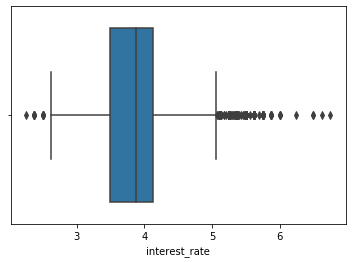

In [13]:
#Plotting interest_rate
import seaborn as sns
sns.boxplot(train['interest_rate'])

In [14]:
train.drop(train.loc[train['interest_rate']>5.25].index,inplace=True)  #upper limit is 5.25

In [15]:
train.loc[train['debt_to_income_ratio']>60].index  #upper limit is 59.93

Int64Index([23455, 107296], dtype='int64')

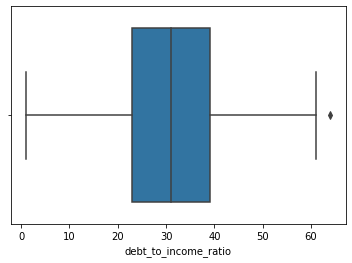

In [16]:
sns.boxplot(train['debt_to_income_ratio'])

In [17]:
train.drop(train.loc[train['debt_to_income_ratio']>60].index,inplace=True)

In [18]:
train['insurance_percent'].value_counts()

0.00     102108
30.00      5108
25.00      4882
12.00      2490
6.00        700
35.00       371
16.00        18
18.00        12
20.00         3
17.00         2
15.00         1
39.00         1
22.00         1
40.00         1
Name: insurance_percent, dtype: int64

In [19]:
#Dropping the column as it is not adding much information and it is 0 for most of the data
train.drop('insurance_percent',axis=1,inplace=True)

In [20]:
#These are exceptions but not outliers.We cannot afford to delete all of them as will loose information
train.loc[train['unpaid_principal_bal']>552280]['unpaid_principal_bal']               #upper_limit is 552280

34        588000
175       610000
365       590000
662       621000
671       626000
758       626000
873       590000
903       623000
976       605000
1115      600000
1186      557000
1254      625000
1374      603000
1616      626000
1743      555000
2090      620000
2131      609000
2223      562000
2233      625000
2394      625000
2429      580000
2448      556000
2579      605000
2600      600000
2753      623000
2767      616000
2839      581000
2966      625000
3548      626000
3657      600000
           ...  
113604    639000
113642    570000
113745    626000
113779    619000
113811    615000
113963    565000
113988    575000
114049    611000
114053    589000
114207    616000
114355    608000
114523    610000
114533    602000
114593    600000
114649    600000
114654    603000
114669    604000
114753    625000
114838    626000
114865    583000
114899    615000
115040    619000
115309    639000
115333    626000
115562    555000
115583    626000
115584    555000
115749    5880

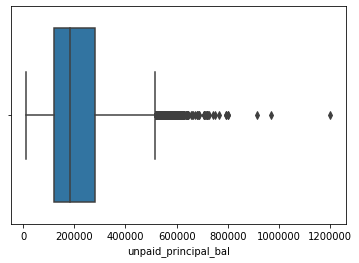

In [276]:
sns.boxplot(train['unpaid_principal_bal'])

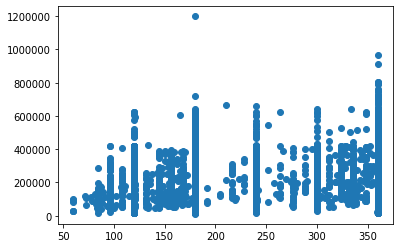

In [277]:
plt.scatter(train['loan_term'],train['unpaid_principal_bal'])

In [21]:
#These can be considered as potential outliers
train.loc[train['unpaid_principal_bal']>800000]['unpaid_principal_bal']

37800     968000
64868     802000
72978     915000
84135    1200000
96610     802000
Name: unpaid_principal_bal, dtype: int64

In [22]:
train.drop(train.loc[train['unpaid_principal_bal']>800000].index,inplace=True)

In [23]:
train.shape

(115693, 28)

In [24]:
train['financial_institution'].value_counts()

OTHER                          49624
Browning-Hart                  31739
Swanson, Newton and Miller      6840
Edwards-Hoffman                 4827
Martinez, Duffy and Bird        4674
Miller, Mcclure and Allen       3149
Nicholson Group                 2110
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1784
Cole, Brooks and Vincent        1596
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1254
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

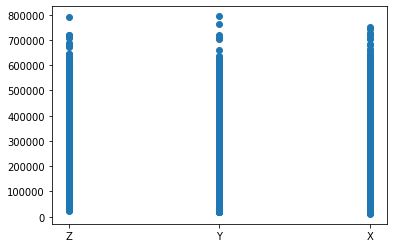

In [25]:
plt.scatter(train['source'],train['unpaid_principal_bal'])

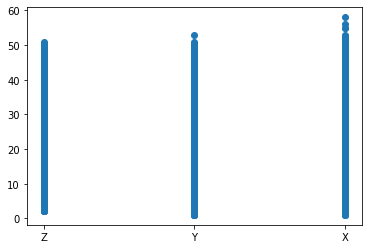

In [26]:
plt.scatter(train['source'],train['debt_to_income_ratio'])

In [183]:
train['source'].value_counts()

X    63661
Y    37406
Z    14626
Name: source, dtype: int64

In [165]:
#Dropping the source column as it is not causing any variation in the data
#train.drop('source',inplace=True,axis=1)

In [23]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')

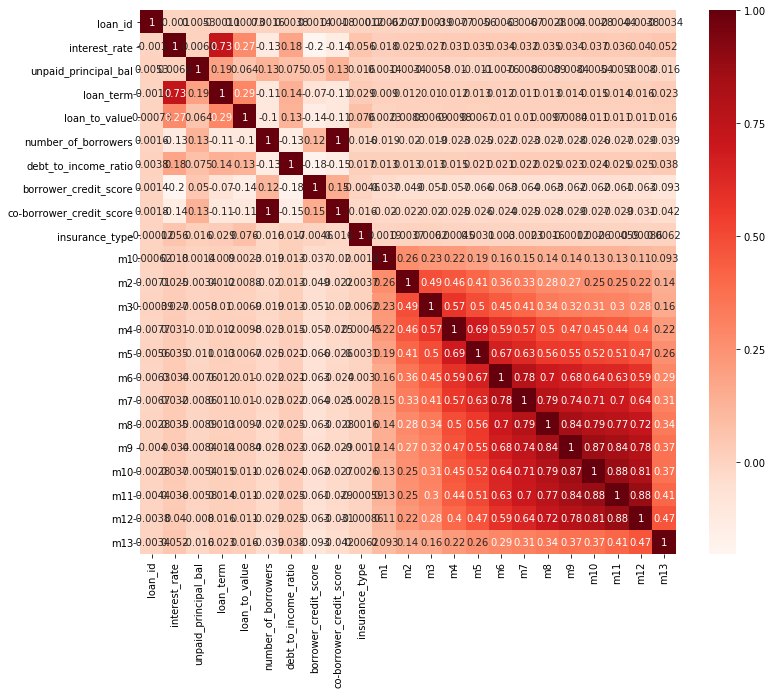

In [24]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [25]:
#Correlation with output variable
cor_target = abs(cor["m13"])

In [26]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.35]
relevant_features

m9    0.37
m10   0.37
m11   0.41
m12   0.47
m13   1.00
Name: m13, dtype: float64

In [31]:
print(train[['m13','interest_rate','loan_term','number_of_borrowers','borrower_credit_score','co-borrower_credit_score']].corr())


                           m13  interest_rate  loan_term  number_of_borrowers  \
m13                       1.00           0.05       0.02                -0.04   
interest_rate             0.05           1.00       0.73                -0.13   
loan_term                 0.02           0.73       1.00                -0.11   
number_of_borrowers      -0.04          -0.13      -0.11                 1.00   
borrower_credit_score    -0.09          -0.20      -0.07                 0.12   
co-borrower_credit_score -0.04          -0.14      -0.11                 1.00   

                          borrower_credit_score  co-borrower_credit_score  
m13                                       -0.09                     -0.04  
interest_rate                             -0.20                     -0.14  
loan_term                                 -0.07                     -0.11  
number_of_borrowers                        0.12                      1.00  
borrower_credit_score                      1.00     

In [30]:
#train=q  #backup
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')

In [38]:
Train = train[['m9','m11','m12','m13','interest_rate','loan_term','borrower_credit_score']]

In [34]:
Train['interest_rate'] = (Train['interest_rate']-Train['interest_rate'].mean())/Train['interest_rate'].std(ddof=0)
#Train['unpaid_principal_bal_zscore'] = (test['unpaid_principal_bal']-test['unpaid_principal_bal'].mean())/test['unpaid_principal_bal'].std(ddof=0)
Train['loan_term'] = (Train['loan_term']-Train['loan_term'].mean())/Train['loan_term'].std(ddof=0)
#Train['loan_to_value_zscore'] = (test['loan_to_value']-test['loan_to_value'].mean())/test['loan_to_value'].std(ddof=0)
#Train['number_of_borrowers_zscore'] = (test['number_of_borrowers']-test['number_of_borrowers'].mean())/test['number_of_borrowers'].std(ddof=0)
#Train['debt_to_income_ratio_zscore'] = (test['debt_to_income_ratio']-test['debt_to_income_ratio'].mean())/test['debt_to_income_ratio'].std(ddof=0)
Train['borrower_credit_score'] = (Train['borrower_credit_score']-Train['borrower_credit_score'].mean())/Train['borrower_credit_score'].std(ddof=0)
Train['co-borrower_credit_score'] = (Train['co-borrower_credit_score']-Train['co-borrower_credit_score'].mean())/Train['co-borrower_credit_score'].std(ddof=0)

c:\users\719475\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\719475\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\719475\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

In [39]:
Train.head()
#pd.crosstab(train['m13'],train['number_of_borrowers_zscore'])

,m9,m11,m12,m13,interest_rate,loan_term,borrower_credit_score
0,0,0,0,1,4.25,360,694.00
1,0,1,0,1,4.88,360,697.00
2,0,0,0,1,3.25,180,780.00
3,1,1,1,1,4.75,360,633.00
4,8,10,11,1,4.75,360,681.00


In [61]:
train = pd.get_dummies(train,prefix_sep='_',drop_first=True)

In [40]:
x=Train #backup
x.shape

(115693, 7)

In [41]:
#Target variable is highly imbalanced
#Defaulters are very less (Class 1)
Train['m13'].value_counts()

0    115069
1       624
Name: m13, dtype: int64

Text(0, 0.5, 'Frequency')

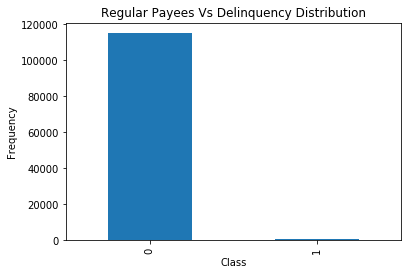

In [42]:
train['m13'].value_counts().plot.bar()
plt.title('Regular Payees Vs Delinquency Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [43]:
Y=Train['m13']
X=Train.drop(['m13'],axis=1,inplace=False)

In [44]:
# train/valid data split in 70/30 ratio
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [45]:
print('Before Oversmapling count of label 1 : {}'.format(sum(Y==1)))
print('Before oversampling count of label 0 : {}'.format(sum(Y==0)))

Before Oversmapling count of label 1 : 624
Before oversampling count of label 0 : 115069


In [46]:
sm = SMOTE(random_state=2)
X_res, Y_res = sm.fit_sample(X, Y.ravel())

In [47]:
print('After Oversmapling shape of X : {}'.format(X_res.shape))
print('After oversampling shape of Y : {}'.format(Y_res.shape))

After Oversmapling shape of X : (230138, 6)
After oversampling shape of Y : (230138,)


In [48]:
print('After Oversmapling count of label 1 : {}'.format(sum(Y_res==1)))
print('After oversampling count of label 0 : {}'.format(sum(Y_res==0)))

After Oversmapling count of label 1 : 115069
After oversampling count of label 0 : 115069


In [49]:
x_train,x_valid,y_train,y_valid = train_test_split(X_res,Y_res, test_size=0.3,random_state=5)

In [50]:
x_train.shape
#(161096, 41)
y_train.shape

(161096,)

In [51]:
x_valid.shape
#(69042, 41)
y_valid.shape

(69042,)

In [52]:
rfc= RandomForestClassifier(n_estimators=1000, max_depth=2,random_state=100)
#clf = GridSearchCV(rfc, parameters, cv=5, verbose=5, n_jobs=3)
rfc.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [53]:
y_pred1 = rfc.predict(x_valid)

In [54]:
f2_scores = f1_score(y_valid, y_pred1)

In [55]:
f2_scores

0.8365820603342982

In [57]:
cnf_matrix = confusion_matrix(y_valid, y_pred1)

In [58]:
cnf_matrix

array([[34275,   160],
       [ 9607, 25000]], dtype=int64)

In [59]:
print(classification_report(y_valid,y_pred1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     34435
           1       0.99      0.72      0.84     34607

    accuracy                           0.86     69042
   macro avg       0.89      0.86      0.86     69042
weighted avg       0.89      0.86      0.86     69042



In [150]:
#Using K-Fold CV to avoid overfitting of model
#parameters = {'C': np.linspace(1, 10, 10)}
#lr = LogisticRegression()
#clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
#clf.fit(x_train, y_train.ravel())

In [151]:
#clf.best_params_

In [152]:
#lr1 = LogisticRegression(C=1,penalty='l1', verbose=5)
#lr1.fit(x_train, y_train.ravel())

In [60]:
test['interest_rate'] = (test['interest_rate']-test['interest_rate'].mean())/test['interest_rate'].std(ddof=0)
#test['unpaid_principal_bal_zscore'] = (test['unpaid_principal_bal']-test['unpaid_principal_bal'].mean())/test['unpaid_principal_bal'].std(ddof=0)
test['loan_term'] = (test['loan_term']-test['loan_term'].mean())/test['loan_term'].std(ddof=0)
#test['loan_to_value_zscore'] = (test['loan_to_value']-test['loan_to_value'].mean())/test['loan_to_value'].std(ddof=0)
#test['number_of_borrowers_zscore'] = (test['number_of_borrowers']-test['number_of_borrowers'].mean())/test['number_of_borrowers'].std(ddof=0)
#test['debt_to_income_ratio_zscore'] = (test['debt_to_income_ratio']-test['debt_to_income_ratio'].mean())/test['debt_to_income_ratio'].std(ddof=0)
test['borrower_credit_score'] = (test['borrower_credit_score']-test['borrower_credit_score'].mean())/test['borrower_credit_score'].std(ddof=0)
#test['co-borrower_credit_score_zscore'] = (test['co-borrower_credit_score']-test['co-borrower_credit_score'].mean())/test['co-borrower_credit_score'].std(ddof=0)

In [61]:
test.columns
x_test=test[['m9','m11','m12','interest_rate','loan_term','borrower_credit_score']]


In [62]:
#Final Prediction
y1 = rfc.predict(x_test)


In [63]:
df1 = pd.DataFrame(y1,columns = ['m13'])


df1['loan_id']=test['loan_id']


df1 = df1[['loan_id','m13']]


df1.set_index(['loan_id'],inplace=True)


In [64]:
df1['m13'].value_counts()

0    35669
1      197
Name: m13, dtype: int64

In [65]:
#Creating the csv
df1.to_csv('Test_rfc1_predict.csv')